# 作業 : (Kaggle)鐵達尼生存預測
https://www.kaggle.com/c/titanic

# [作業目標]
- 試著調整特徵篩選的門檻值, 觀察會有什麼影響效果

# [作業重點]
- 調整相關係數過濾法的篩選門檻, 看看篩選結果的影響 (In[5]~In[8], Out[5]~Out[8])
- 調整L1 嵌入法篩選門檻, 看看篩選結果的影響 (In[9]~In[11], Out[9]~Out[11])

In [77]:
# 做完特徵工程前的所有準備 (與前範例相同)
import pandas as pd
import numpy as np
import copy
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

data_path = 'data/'
df = pd.read_csv(data_path + 'titanic_train.csv')

train_Y = df['Survived']                # 取出目標值
df = df.drop(['PassengerId'] , axis=1)  # 去掉 ID 欄位
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


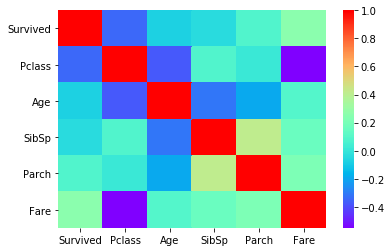

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [78]:
# 計算df整體相關係數, 並繪製成熱圖
import seaborn as sns
import matplotlib.pyplot as plt
corr = df.corr()                                   # 計算出所有欄位之間的[相關係數]
sns.heatmap(corr,cmap='rainbow')                   # 印出[相關係數]熱圖
plt.show()
corr

In [79]:
# 記得刪除 Survived
df = df.drop(['Survived'] , axis=1)                             # 刪除目標值欄位

#只取 int64, float64 兩種數值型欄位, 存於 num_features 中
num_features = []   
for dtype, feature in zip(df.dtypes, df.columns):               
    if dtype == 'float64' or dtype == 'int64':                  # 篩選出數值型欄位
        num_features.append(feature)                            # 將欄位名稱加入列表
print(f'{len(num_features)} Numeric Features : {num_features}\n')

# 削減文字型欄位, 只剩數值型欄位
df = df[num_features]                                           # 只留下數值型欄位
df = df.fillna(-1)                                              # 缺值補-1
MMEncoder = MinMaxScaler()                                      # 設定最大最小化
df.head()

5 Numeric Features : ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']



,Pclass,Age,SibSp,Parch,Fare
0,3,22.0,1,0,7.2500
1,1,38.0,1,0,71.2833
2,3,26.0,0,0,7.9250
3,1,35.0,1,0,53.1000
4,3,35.0,0,0,8.0500


# 作業1
* 鐵達尼生存率預測中，試著變更兩種以上的相關係數門檻值，觀察預測能力是否提升?

# Ans :
## 第一次篩選用 [相關係數 > 0.05] or [相關係數 < -0.05] 做標準，分數有很小幅的提升
## 第二次篩選用 [相關係數 > 0.1] or [相關係數 < -0.1] 做標準，分數卻下降，可能是因為特徵值剩下太少

In [80]:
# 原始特徵 + 邏輯斯迴歸
train_X = MMEncoder.fit_transform(df)                       # 最大最小化
estimator = LogisticRegression()                            # 線性回歸
cross_val_score(estimator, train_X, train_Y, cv=5).mean()   # 分數計算

0.70041428661101

In [81]:
# 篩選相關係數1
high_list = list( corr[ abs(corr['Survived']) > 0.05 ].index )       # 其他欄位跟['Survived']的 [相關係數] > 0.05 or [相關係數] < -0.05
high_list.pop(0)                                                     # 去除目標值欄位
print(high_list)        # 篩選後的欄位
print(list(df))         # 原始欄位

['Pclass', 'Age', 'Parch', 'Fare']
['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


In [82]:
# 特徵1 + 邏輯斯迴歸
train_X = MMEncoder.fit_transform(df[high_list])                    # 利用篩選後的[欄位列表]做計算
estimator = LogisticRegression()
cross_val_score(estimator, train_X, train_Y, cv=5).mean()

0.703785073127864

In [86]:
# 篩選相關係數2
high_list = list( corr[ abs(corr['Survived']) > 0.1 ].index )       # 其他欄位跟['Survived']的 [相關係數] > 0.1 or [相關係數] < -0.1
high_list.pop(0)                                                    # 去除目標值欄位
high_list           # 篩選後欄位

['Pclass', 'Fare']

In [87]:
# 特徵2 + 邏輯斯迴歸
train_X = MMEncoder.fit_transform(df[high_list])                    # 利用[篩選後欄位]做計算
estimator = LogisticRegression()                                
cross_val_score(estimator, train_X, train_Y, cv=5).mean()

0.6790973573535873

# 作業2
* 續上題，使用 L1 Embedding 做特徵選擇(自訂門檻)，觀察預測能力是否提升?

# Ans : 
## 我們門檻標準設 [係數 > 0.2] or [係數 < -0.2]，篩出來的欄位與[相關係數篩選]第一次一樣，所以分數比起原始特徵為小幅上升

In [97]:
from sklearn.linear_model import Lasso

L1_Reg = Lasso(alpha=0.001)             # 設定 L1回歸
train_X = MMEncoder.fit_transform(df)   # 使用最大最小化

L1_Reg.fit(train_X, train_Y)            # 進行回歸擬合計算 ???
L1_Reg.coef_                            # 擬合過的係數 ???

array([-0.39684291, -0.25338753, -0.19144856,  0.28161304,  0.28188094])

In [98]:
from itertools import compress
L1_mask = list((L1_Reg.coef_>0.2) | (L1_Reg.coef_<-0.2))         # 係數門檻篩選( [係數>0.2] or [係數<-0.2] )
L1_list = list(compress(list(df), list(L1_mask)))                # 得到篩選出的欄位名稱
##############
'''
compress( data , select )
可利用 select 條件(bool)，篩選data
data : 為資料，通常為 list
select : 為選擇條件，為bool值，ex : [1,0,1,1,0]、[True,False,True,True]

其中 L1_mask 為布林值條件，可用此方法篩選 df 的欄位(名稱)
'''
############## 
L1_list

['Pclass', 'Age', 'Parch', 'Fare']

In [99]:
# L1_Embedding 特徵 + 線性迴歸
train_X = MMEncoder.fit_transform(df[L1_list])                    # 利用篩選後的[欄位列表]做計算
cross_val_score(estimator, train_X, train_Y, cv=5).mean()         # 分數計算

0.703785073127864